<a href="https://colab.research.google.com/github/Arafat4341/Bike-Ride-Sharing-Data-Analysis/blob/master/Bike_ride_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content

In this notebook, we shall analyse bike ride sharing data of the city Austrin. The data includes information on bike trip start location, stop location, duration, type of bike share user. Bike station location data is also provided.

## Austin Bike Ride Sharing Data Analysis

In [4]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data loading
data = pd.read_csv('austin_bikeshare_trips.csv')

data.head()

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41.0,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9.900083e+09,2015.0
1,141.0,2:06:04,6.0,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,1.261768e+07,2016.0
2,578.0,16:28:27,13.0,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9.075366e+06,2016.0
3,555.0,15:12:00,80.0,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9.900319e+09,2014.0
4,86.0,15:39:13,25.0,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,1.446860e+07,2017.0


In [5]:
data.shape

(132616, 12)

In [6]:
#checking null values
data.isnull().sum()

bikeid                 143
checkout_time            1
duration_minutes         1
end_station_id        4072
end_station_name         1
month                 6202
start_station_id      3834
start_station_name       1
start_time               1
subscriber_type        432
trip_id                  1
year                  6202
dtype: int64

## Demanding Station

In [0]:
# total unique start stations
start_station = data['start_station_name'].value_counts()

In [8]:
start_station.shape

(88,)

In [13]:
start_station

City Hall / Lavaca & 2nd                                5844
Riverside @ S. Lamar                                    5844
5th & Bowie                                             5531
2nd & Congress                                          5437
4th & Congress                                          5260
Convention Center / 4th St. @ MetroRail                 4987
Rainey St @ Cummings                                    4795
Davis at Rainey Street                                  4517
Capitol Station / Congress & 11th                       4035
Pfluger Bridge @ W 2nd Street                           3989
Long Center @ South 1st & Riverside                     3252
Barton Springs & Riverside                              3220
Barton Springs @ Kinney Ave                             3171
3rd & West                                              3148
Palmer Auditorium                                       3064
South Congress & James                                  2970
South Congress & Academy

## Popular station

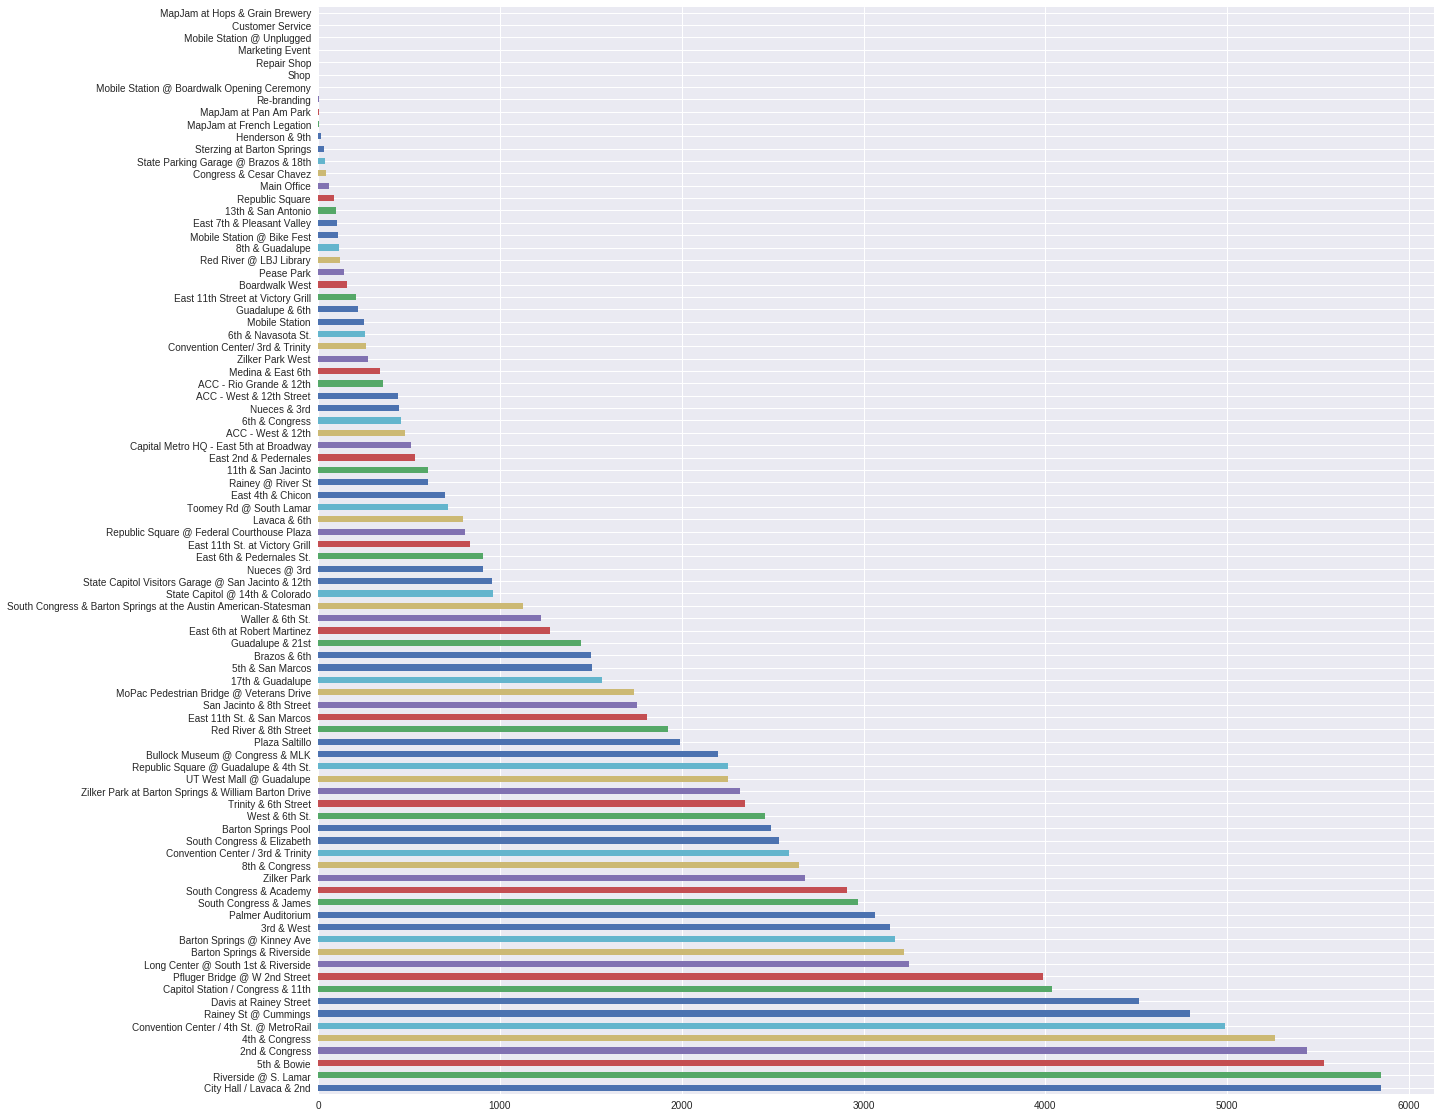

In [17]:
plt.figure(figsize=(20,20))
start_station.plot.barh()
#plt.show()
#plt.savefig('demand.png')

In [18]:
np.unique(data['year'])

array([2013., 2014., 2015., ...,   nan,   nan,   nan])

## Yearly total ride

Text(0, 0.5, 'Ride Count')

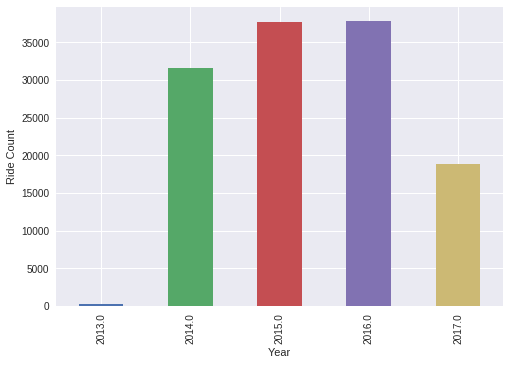

In [19]:
year=data['year'].value_counts()
year.sort_index(inplace=True)
plt.figure()
year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Ride Count')

## Pick-Hour Finding



In [20]:
cot = data['checkout_time']
cot.describe()

count       132615
unique       37951
top       16:12:00
freq          5188
Name: checkout_time, dtype: object

In [23]:
data['checkout_time'].value_counts() # We can see which time in a day there are most checkouts.

16:12:00    5188
15:12:00    5029
14:12:00    5004
17:12:00    4940
13:12:00    4893
12:12:00    4530
18:12:00    4417
11:12:00    3600
19:12:00    3461
10:12:00    2671
20:12:00    2589
21:12:00    2188
9:12:00     2101
22:12:00    1595
8:12:00     1558
23:12:00    1048
0:12:00      782
7:12:00      685
2:12:00      537
1:12:00      510
6:12:00      241
3:12:00      103
5:12:00       67
4:12:00       62
16:12:48      40
14:12:20      35
15:12:38      34
14:12:46      33
12:12:46      33
14:12:58      33
            ... 
19:54:58       1
13:31:11       1
23:02:23       1
16:42:55       1
16:06:15       1
9:59:09        1
8:10:36        1
7:49:24        1
12:25:19       1
21:09:03       1
18:44:06       1
22:28:40       1
15:50:03       1
14:23:44       1
9:38:21        1
7:46:46        1
19:17:41       1
21:44:22       1
8:02:38        1
12:33:18       1
19:46:40       1
18:54:17       1
7:45:26        1
19:05:24       1
11:14:12       1
14:27:26       1
20:06:25       1
2:14:01       

## Most pick-hour

In [0]:

data['Hour']=data['checkout_time'].apply(lambda x:x.hour)

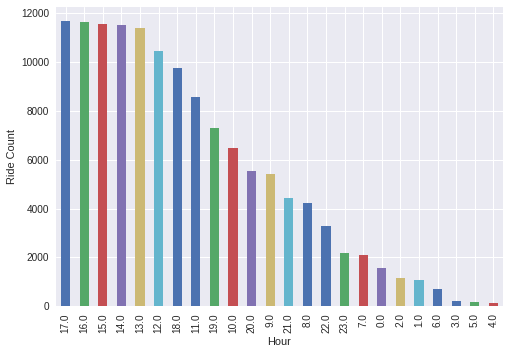

In [27]:
checkout=data['Hour'].value_counts()
plt.figure()
checkout.plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('Ride Count')
plt.show()